In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import PIL.ImageOps  
import numpy as np

In [3]:
FJoin = os.path.join

In [4]:
f_data_final = ['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
print(f_data_final)

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


In [5]:
data_train_drive_link = '/content/drive/MyDrive/csvdata_notargument/Dataframe_training_final.csv'
label_train_drive_link = '/content/drive/MyDrive/csvdata_notargument/Labelframe_training_final.csv'

data_test_drive_link = '/content/drive/MyDrive/csvdata_notargument/Dataframe_testing_final.csv'
label_test_drive_link = '/content/drive/MyDrive/csvdata_notargument/Labelframe_testing_final.csv'

In [6]:
def read_data(link_data, link_label):
    data = pd.read_csv(link_data, header=None)
    label = pd.read_csv(link_label, header=None)
    return np.array(data), np.array(label).ravel()

In [7]:
data_train, label_train = read_data(data_train_drive_link, label_train_drive_link)
data_test, label_test = read_data(data_test_drive_link, label_test_drive_link)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score,precision_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn import metrics
import math

In [9]:
def change_to_char(num):
  listchar = ['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
  listnum = [i for i in range(0,89)]
  if (num >= 0 and num <= 88):
    k = listnum.index(num)
    return listchar[k]
  else:
    return -1

In [10]:
Scaler = MinMaxScaler()

data_train = Scaler.fit_transform(data_train)

data_test = Scaler.transform(data_test)

In [11]:
#for i in [1, 7, 8, 10, 100]:
    #print("\n---- WITH C =", i, "----")
    #clf = svm.SVC(C = i, kernel = 'poly')
    #clf.fit(data_train, label_train)
    #predicted = clf.predict(data_test)
    #print('       Accuracy = %.4f' % (accuracy_score(label_test, predicted)*100) + ' %')

In [12]:
from sklearn.model_selection import KFold
import numpy as np

In [13]:
# Định nghĩa K-Fold CV
kfold = KFold(n_splits=10, shuffle=True)
accuracy_list = []
# K-fold Cross Validation model evaluation
fold_idx = 1
for train_ids, val_ids in kfold.split(data_train, label_train):
    model = svm.SVC(C = 7, kernel = 'poly')
    print("Bắt đầu train Fold", fold_idx)
    # Train model
    model.fit(data_train[train_ids], label_train[train_ids])
    predicted = model.predict(data_train[val_ids])
    # Test và in kết quả
    scores = accuracy_score(predicted, label_train[val_ids])
    print("Đã train xong Fold", fold_idx)
    # Thêm thông tin accuracy và loss vào list
    accuracy_list.append(scores * 100)
    # Sang Fold tiếp theo
    fold_idx = fold_idx + 1

Bắt đầu train Fold 1
Đã train xong Fold 1
Bắt đầu train Fold 2
Đã train xong Fold 2
Bắt đầu train Fold 3
Đã train xong Fold 3
Bắt đầu train Fold 4
Đã train xong Fold 4
Bắt đầu train Fold 5
Đã train xong Fold 5
Bắt đầu train Fold 6
Đã train xong Fold 6
Bắt đầu train Fold 7
Đã train xong Fold 7
Bắt đầu train Fold 8
Đã train xong Fold 8
Bắt đầu train Fold 9
Đã train xong Fold 9
Bắt đầu train Fold 10
Đã train xong Fold 10


In [14]:
# In kết quả tổng thể
print('* Chi tiết các fold')
for i in range(0, len(accuracy_list)):
  print(f'> Fold {i+1} - Accuracy: {accuracy_list[i]}%')

print('* Đánh giá tổng thể các folds:')
print(f'> Accuracy: {np.mean(accuracy_list)} (Độ lệch +- {np.std(accuracy_list)})')

* Chi tiết các fold
> Fold 1 - Accuracy: 77.89911596463858%
> Fold 2 - Accuracy: 78.99115964638585%
> Fold 3 - Accuracy: 78.1591263650546%
> Fold 4 - Accuracy: 79.30317212688507%
> Fold 5 - Accuracy: 78.88715548621946%
> Fold 6 - Accuracy: 77.9511180447218%
> Fold 7 - Accuracy: 80.18720748829952%
> Fold 8 - Accuracy: 79.5631825273011%
> Fold 9 - Accuracy: 79.04316172646905%
> Fold 10 - Accuracy: 78.87617065556711%
* Đánh giá tổng thể các folds:
> Accuracy: 78.8860570031542 (Độ lệch +- 0.6883237330816617)


In [15]:
clf = svm.SVC(C = 7, kernel = 'poly')
clf.fit(data_train, label_train)
predicted = clf.predict(data_test)

In [16]:
print("* MODEL: NON-LINEAR SVM (kernel = 'poly') WITH C = 7")
print('       Accuracy = %.4f' % (accuracy_score(label_test, predicted)*100) + ' %\n')

* MODEL: NON-LINEAR SVM (kernel = 'poly') WITH C = 7
       Accuracy = 46.6622 %



In [17]:
print(classification_report(predicted, label_test, target_names=f_data_final))

              precision    recall  f1-score   support

           a       0.63      0.91      0.75        34
          à       0.10      0.26      0.14        19
          á       0.36      0.28      0.32        64
          â       0.40      0.36      0.38        56
         ầ       0.18      0.19      0.18        48
         ấ       0.14      0.24      0.18        29
         ẫ       0.06      0.07      0.07        41
         ẩ       0.28      0.41      0.33        34
          ã       0.08      0.25      0.12        16
          ă       0.22      0.29      0.25        38
         ằ       0.44      0.36      0.40        61
         ắ       0.20      0.28      0.23        36
         ẵ       0.40      0.20      0.27        98
         ẳ       0.32      0.30      0.31        53
          ả       0.48      0.32      0.38        75
          ạ       0.82      0.60      0.69        68
         ậ       0.32      0.48      0.39        33
         ặ       0.58    

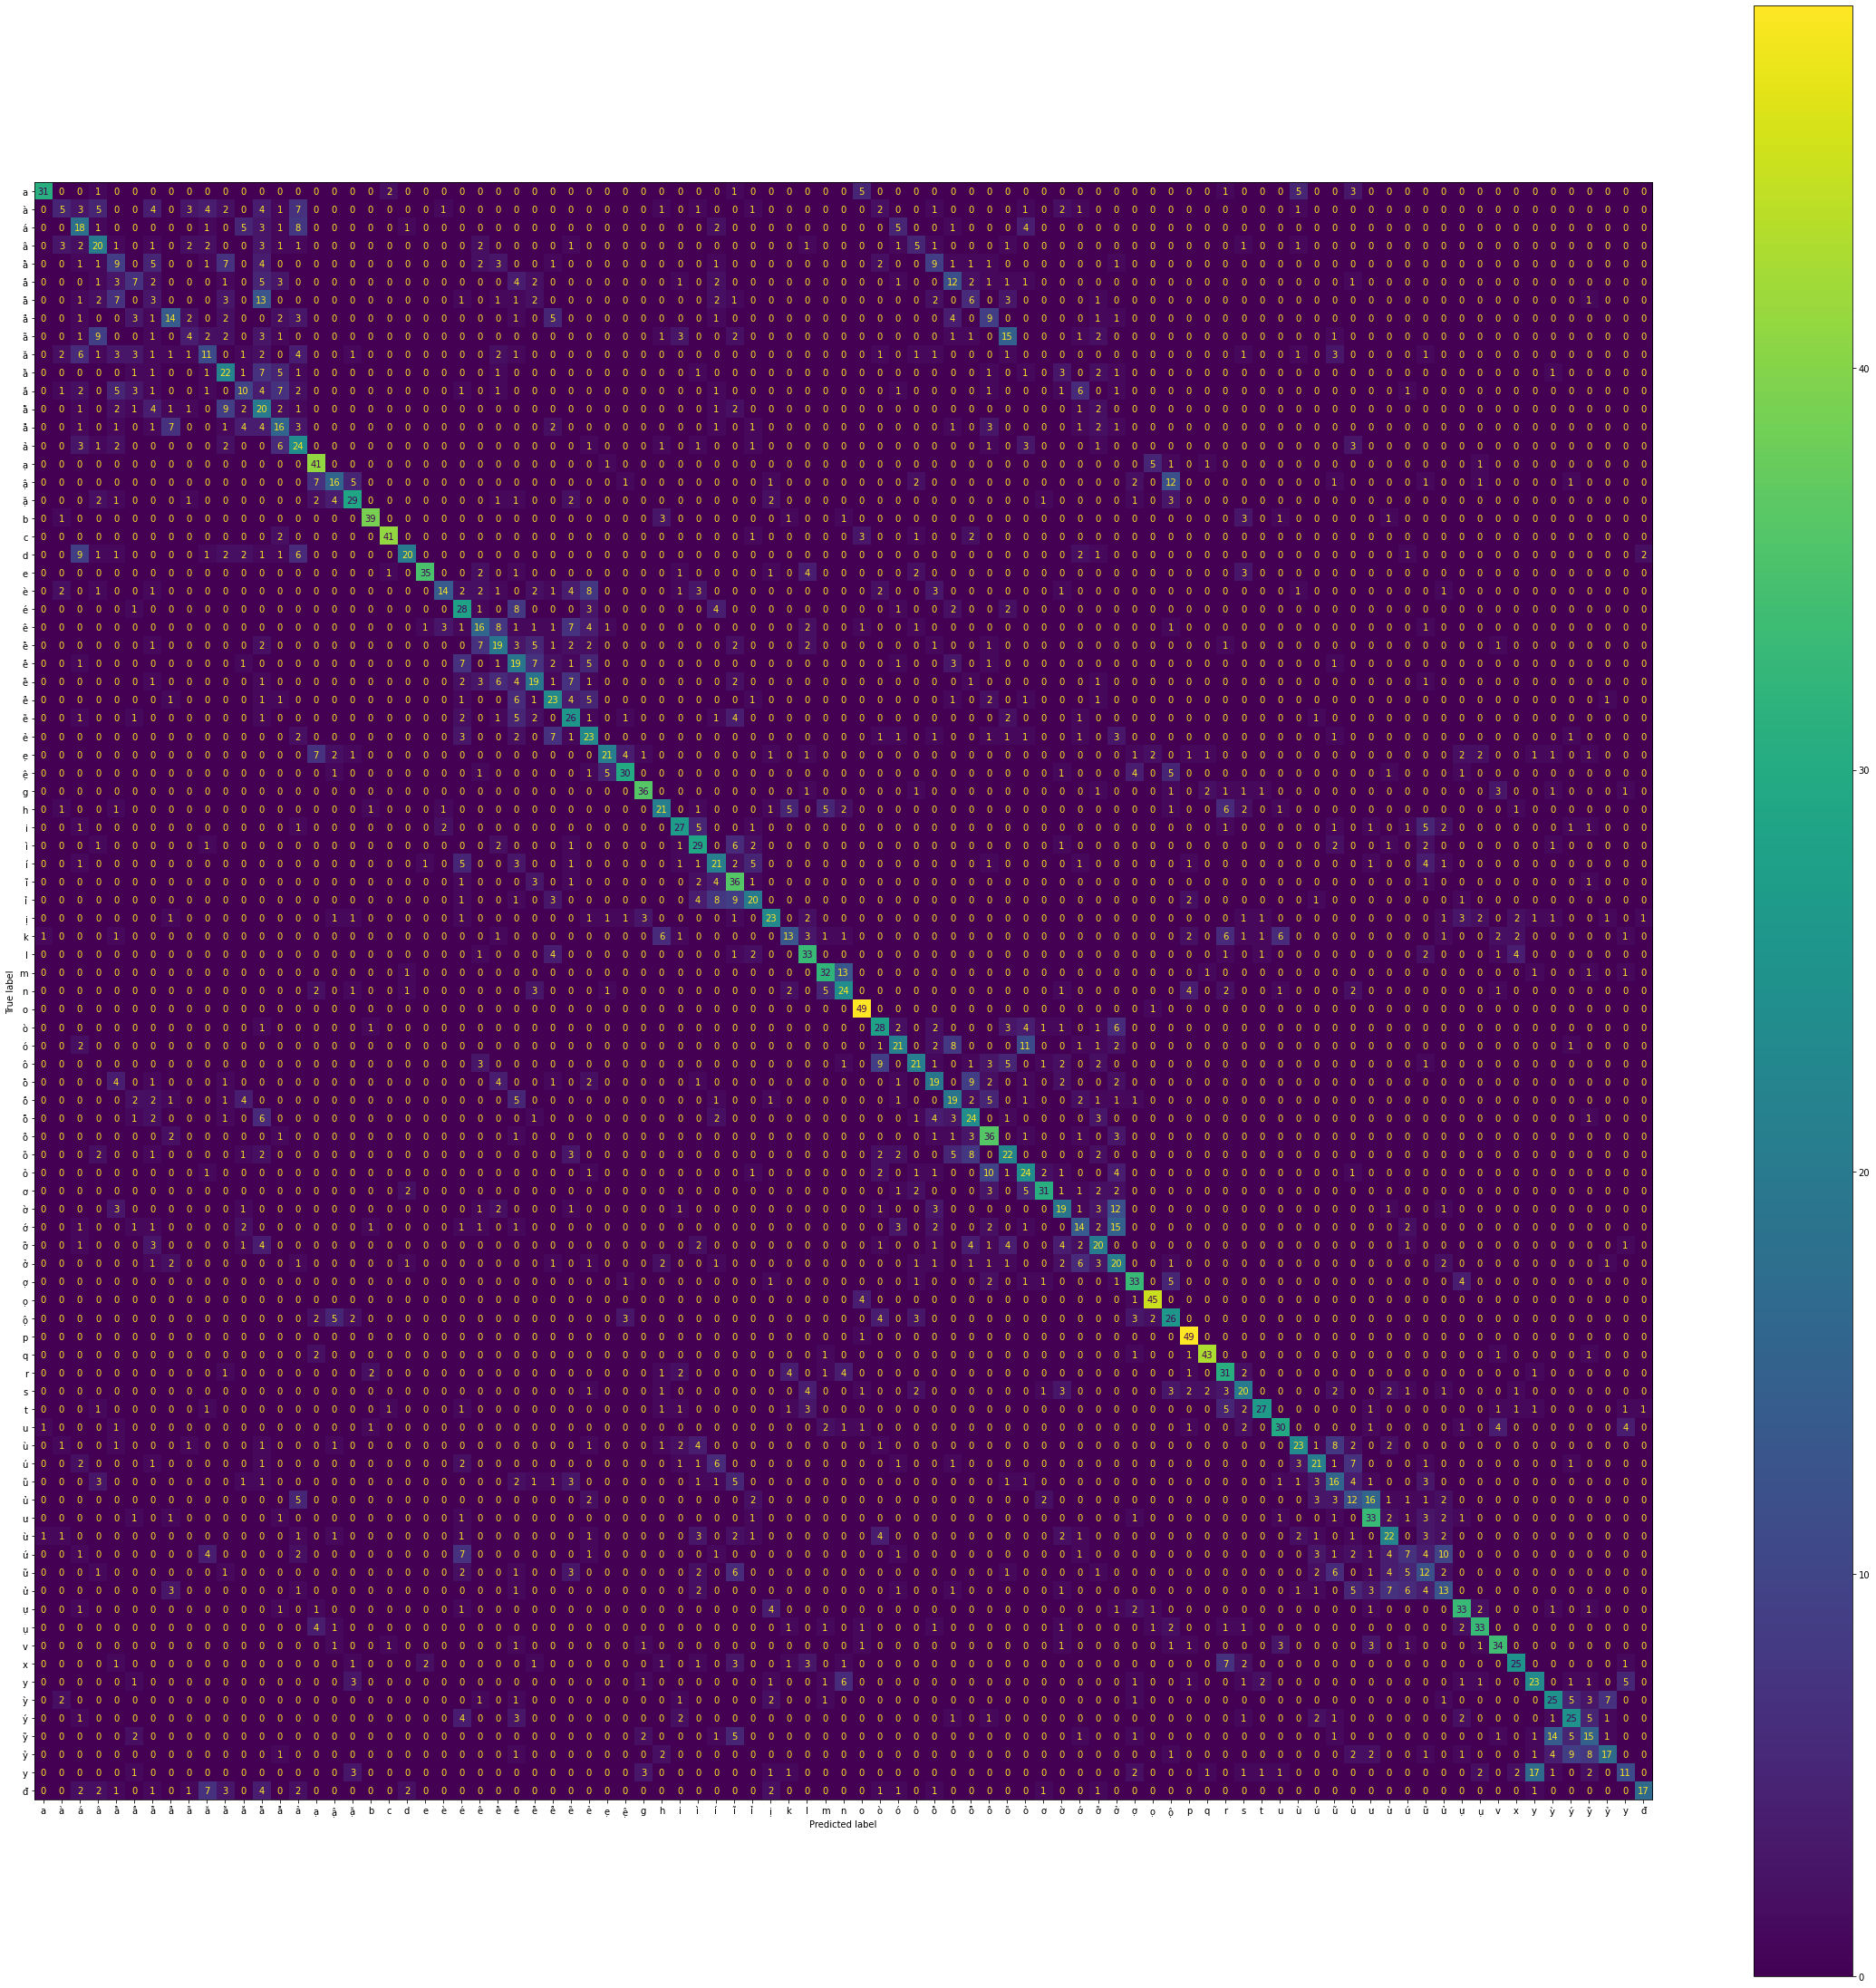

In [18]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 40, 40
from sklearn.metrics import plot_confusion_matrix
cm = plot_confusion_matrix(clf, data_test, label_test, display_labels=f_data_final)
plt.show()